In [61]:
import numpy as np
import plotly.express as px
import pandas as pd

In [62]:
df = pd.read_csv('life_expectancy.csv')

In [63]:
df.sample(frac=0.01)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2501,Swaziland,2003,Developing,45.9,6.0,3,5.65,2.819124,9.0,350,...,87.0,5.71,85.0,50.6,22.994490,187392.00,8.2,8.4,0.493,9.1
2557,Tajikistan,2011,Developing,68.1,166.0,10,0.32,51.991923,96.0,1,...,97.0,5.98,96.0,0.2,834.541295,7815949.00,3.7,3.7,0.608,11.1
2815,Uruguay,2010,Developing,76.3,118.0,0,6.21,2331.532804,95.0,0,...,95.0,8.63,95.0,0.1,11938.212000,3374415.00,1.5,1.5,0.777,15.6
893,Ethiopia,2004,Developing,55.0,354.0,217,0.86,1.506962,NaN,73,...,54.0,4.23,4.0,4.1,135.762386,7462445.00,11.5,11.3,0.310,5.4
2057,Portugal,2013,Developed,86.0,79.0,0,10.00,2698.018170,98.0,1,...,98.0,9.55,98.0,0.1,21618.735340,1457295.00,0.7,0.5,0.827,16.3
225,Belarus,2014,Developing,72.0,199.0,0,13.94,1147.111400,97.0,64,...,97.0,5.69,97.0,0.1,8318.429294,9474511.00,1.9,2.0,0.796,15.7
226,Belarus,2013,Developing,71.7,23.0,0,14.66,1109.854619,98.0,16,...,98.0,6.70,98.0,0.1,7978.825443,9465997.00,2.0,2.0,0.796,15.7
326,Bosnia and Herzegovina,2009,Developing,76.1,97.0,0,4.75,645.021302,9.0,22,...,9.0,9.64,9.0,0.1,4697.897320,3746561.00,2.7,2.7,0.716,13.3
2831,Uzbekistan,2010,Developing,68.3,183.0,20,2.73,119.457115,99.0,117,...,99.0,5.34,99.0,0.2,1377.821400,285624.00,3.0,3.1,0.657,11.9
2169,Saint Lucia,2014,Developing,75.0,139.0,0,9.97,0.000000,99.0,0,...,99.0,6.72,99.0,0.1,NaN,NaN,4.3,4.3,0.723,13.1


In [64]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [65]:
# fill NA with interpolation
for i in df.columns:
    if df[i].dtype == 'String':
        continue  # Bỏ qua cột dạng chuỗi
    df[i] = pd.to_numeric(df[i], errors='coerce')

df = df.interpolate()
#df = df['Country'].fillna(df['Country'].mean(), inplace=True)


In [66]:
df.isna().sum()

Country                            2938
Year                                  0
Status                             2938
Life expectancy                       0
Adult Mortality                       0
infant deaths                         0
Alcohol                               0
percentage expenditure                0
Hepatitis B                           0
Measles                               0
 BMI                                  0
under-five deaths                     0
Polio                                 0
Total expenditure                     0
Diphtheria                            0
 HIV/AIDS                             0
GDP                                   0
Population                            0
 thinness  1-19 years                 0
 thinness 5-9 years                   0
Income composition of resources       0
Schooling                             0
dtype: int64

In [67]:
fig = px.scatter(df, x='Year', y='Life expectancy ', color='Country')
fig.show()

<Axes: >

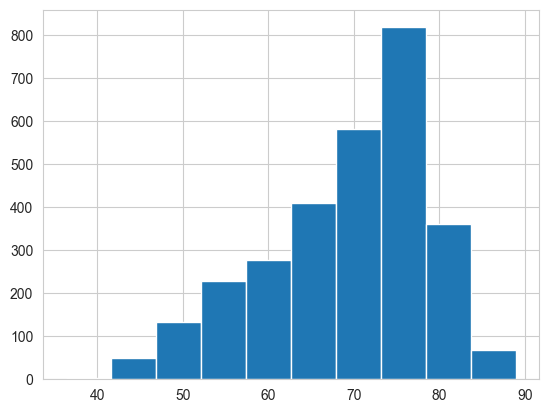

In [68]:
# check normality of column 'lief expectancy'
df['Life expectancy '].hist()
# qqplot for life expectancy

((array([-3.49627962, -3.25218993, -3.11718891, ...,  3.11718891,
          3.25218993,  3.49627962]),
  array([36.3, 39. , 41. , ..., 89. , 89. , 89. ])),
 (9.312175543578773, 69.21487406398911, 0.9782302889111392))

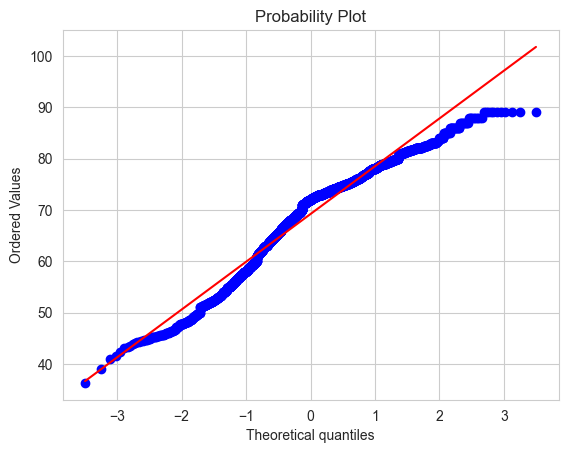

In [69]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df['Life expectancy '], dist="norm", plot=plt)

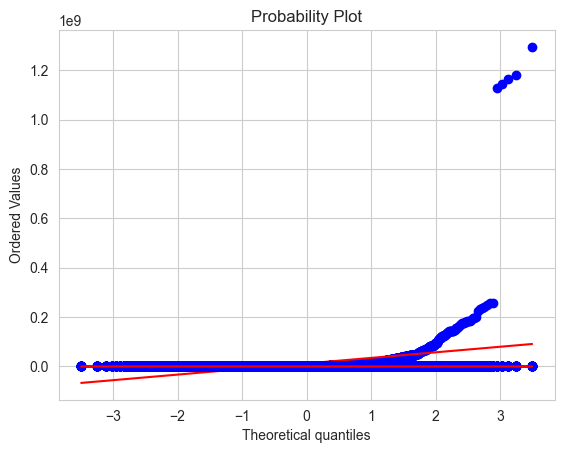

In [70]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    stats.probplot(df[i], dist="norm", plot=plt)

In [71]:
df.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,0.0,2938.000000,0.0,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,NaN,2007.518720,NaN,69.214874,164.744554,30.303948,4.550179,738.251295,78.528421,2419.592240,...,82.474643,5.940643,82.246086,1.742103,7434.749690,1.227954e+07,4.882301,4.920439,0.634369,12.075170
std,NaN,4.613841,NaN,9.510819,124.226596,117.926501,3.994827,1987.914858,25.183772,11467.272489,...,23.420689,2.445735,23.705664,5.077785,13411.023325,5.471776e+07,4.433359,4.532488,0.209603,3.342988
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,...,78.000000,4.312500,78.000000,0.100000,553.618620,2.534093e+05,1.600000,1.600000,0.500000,10.200000
50%,NaN,2008.000000,NaN,72.000000,144.000000,3.000000,3.702500,64.912906,89.000000,17.000000,...,93.000000,5.755000,93.000000,0.100000,2192.681084,1.574070e+06,3.400000,3.400000,0.684000,12.400000
75%,NaN,2012.000000,NaN,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,...,97.000000,7.440000,97.000000,0.800000,7188.875869,8.207892e+06,7.200000,7.300000,0.791107,14.300000
max,NaN,2015.000000,NaN,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          0 non-null      float64
 1   Year                             2938 non-null   int64  
 2   Status                           0 non-null      float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [73]:
df.rename(columns={"Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

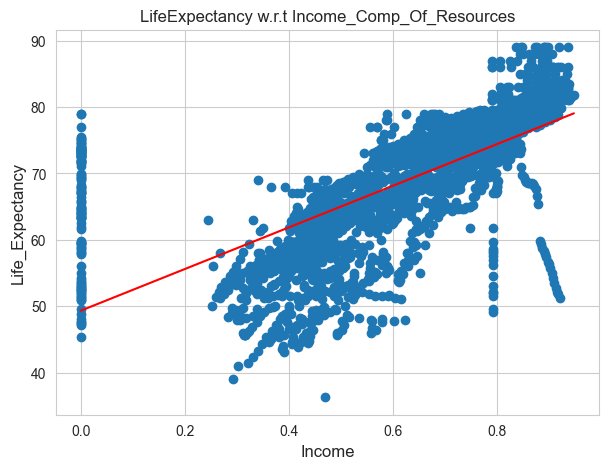

In [74]:
plt.figure(figsize=(7, 5))
plt.title("LifeExpectancy w.r.t Income_Comp_Of_Resources")
plt.xlabel("Income", fontsize=12)
plt.ylabel("Life_Expectancy", fontsize=12)
plt.scatter(df["Income_Comp_Of_Resources"], df["Life_Expectancy"])
# plot regression line
plt.plot(np.unique(df["Income_Comp_Of_Resources"]), np.poly1d(np.polyfit(df["Income_Comp_Of_Resources"], df["Life_Expectancy"], 1))(np.unique(df["Income_Comp_Of_Resources"])), color='red')

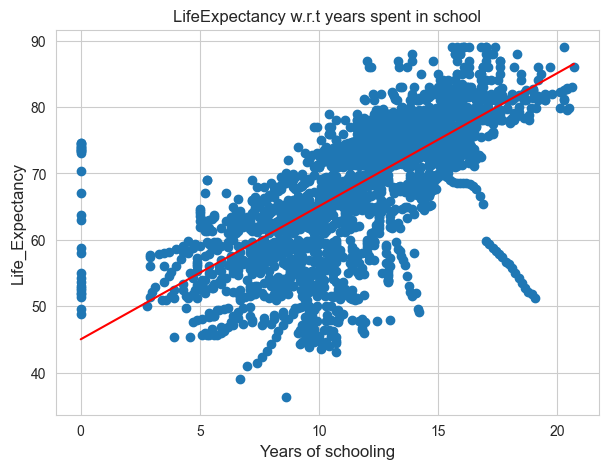

In [75]:
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy w.r.t years spent in school")
plt.xlabel("Years of schooling",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.scatter(df["Schooling"], df["Life_Expectancy"])
# plot regression line
plt.plot(np.unique(df["Schooling"]), np.poly1d(np.polyfit(df["Schooling"], df["Life_Expectancy"], 1))(np.unique(df["Schooling"])), color='red')




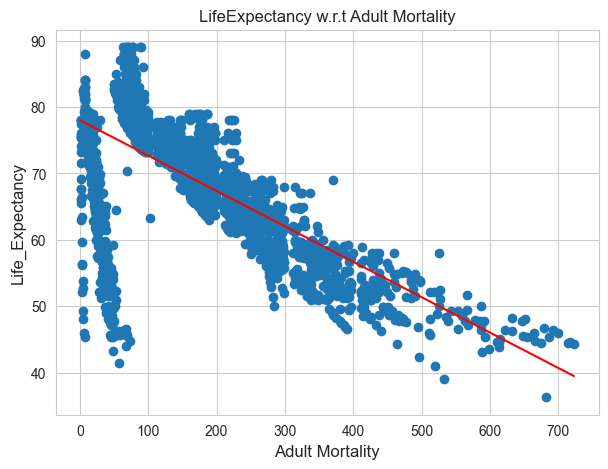

In [76]:
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy w.r.t Adult Mortality")
plt.xlabel("Adult Mortality",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.scatter(df["Adult_Mortality"], df["Life_Expectancy"])
# plot regression line
plt.plot(np.unique(df["Adult_Mortality"]), np.poly1d(np.polyfit(df["Adult_Mortality"], df["Life_Expectancy"], 1))(np.unique(df["Adult_Mortality"])), color='red')

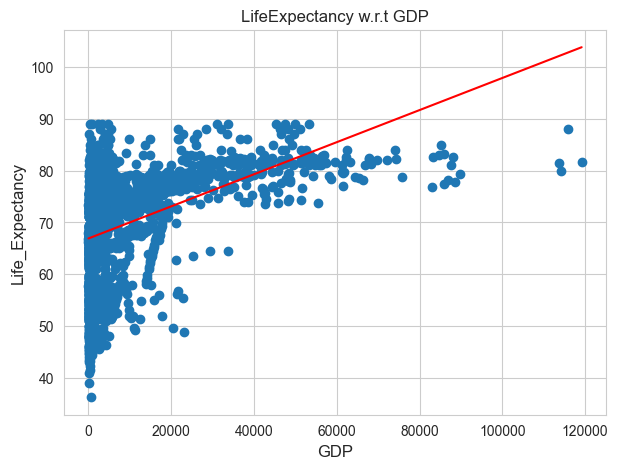

In [77]:
# plot scatter plot for life expectancy vs GDP
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy w.r.t GDP")
plt.xlabel("GDP",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.scatter(df["GDP"], df["Life_Expectancy"])
# plot regression line
plt.plot(np.unique(df["GDP"]), np.poly1d(np.polyfit(df["GDP"], df["Life_Expectancy"], 1))(np.unique(df["GDP"])), color='red')

#### PLOT CHARTS


In [78]:
print(df['Status'].isna().all())  # This will print True if all values are NaN


True


In [79]:
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,NaN,2015,NaN,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,NaN,2014,NaN,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,NaN,2013,NaN,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,NaN,2012,NaN,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,NaN,2011,NaN,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [80]:
import seaborn as sns
# First, check if the 'Status' column has any non-NaN values
if df['Status'].notna().any():
    # Since there are non-NaN values, we can plot the frequency of the 'Status' column
    plt.figure(figsize=(8, 5))
    status_countplot = sns.countplot(x='Status', data=df)
    plt.title('Frequency of Developed vs Developing Countries')
    plt.xlabel('Country Status')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in status_countplot.patches:
        status_countplot.annotate(format(p.get_height(), '.0f'), 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha = 'center', va = 'center', 
                                  xytext = (0, 10), 
                                  textcoords = 'offset points')
    plt.show()
else:
    print("The 'Status' column contains only NaN values. Please check your data.")


The 'Status' column contains only NaN values. Please check your data.
